# DSKUS Group 1 EDA
## Names below

| Dataset Name                        | Source                                      | Time Period       | Size       | Description                                                                                                                                                                                                                              |
|-------------------------------------|---------------------------------------------|-------------------|------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| GCP Fossil CO₂ Emissions Dataset    | [Global Carbon Project (GCP)](https://zenodo.org/record/5569235)                 | 1751 - 2021       | Unknown    | Comprehensive global and national CO₂ emissions data since 2001; includes data on CO₂ emissions from various sources, such as coal, oil, gas, cement, flaring, and other sources.                                                        |
| Climate Watch Dataset               | [International Energy Agency (IEA), U.S. Environmental Protection Agency, U.N. Food and Agriculture Organization, Global Carbon Project](https://www.climatewatchdata.org)   | 1990 - 2019       | Unknown    | Covers all sectors and gases, including energy sub-sectors and Kyoto GHGs (CH4, CO2, N2O, F-gases); does not use countries' official inventories reported to the UNFCCC.                                                                |
| CO₂ Emission Dataset from Kaggle    | International Energy Agency (IEA) and United Nations Framework Convention on Climate Change (UNFCCC) | 1960 - 2020       | Unknown    | Provides a comprehensive overview of the amount of CO₂ emitted by each country; includes information on CO₂ emissions by country from 1960 to 2020; covers all countries in the world and is compiled from various sources.              |


In [35]:
# Installing packages
# Use pip to for installation
#pandas
#matplotlib
#seaborn
#numpy
#plotly

In [32]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import warnings

warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment', None)

In [36]:
# reading the dataframes
emission = pd.read_csv('../Datasets/emission_by_country.csv')
data=pd.read_csv("USA_Ren_Gen.csv")
data.drop(columns="Unnamed: 0",inplace=True)

In [37]:
emission.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Cleaning

In [5]:
# filtering out the rows after 2000
ems = emission[emission['Year'] > 2000].reset_index(drop=True)

In [6]:
ems.shape

(4872, 11)

In [7]:
ems.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,2001,1.069098,0.069616,0.762112,0.208848,0.006538,0.021984,NaN,0.054300
1,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.000000,NaN,0.063856
2,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.000000,NaN,0.068871
3,Afghanistan,AFG,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.000000,NaN,0.052529
4,Afghanistan,AFG,2005,1.889507,0.106256,1.447280,0.329760,0.006211,0.000000,NaN,0.077403


In [8]:
# removing rows with null values in the ISO 3166-1 alpha-3 column
rows_to_remove = ems[ems['ISO 3166-1 alpha-3'].isna()]['Country'].unique().tolist()
ems = ems[~ems['Country'].isin(rows_to_remove)]

In [9]:
# Define the list of columns to check for null values
columns_to_check = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']

# Remove rows where the specified columns have null values
ems.dropna(subset=columns_to_check, how='all', inplace=True)

In [10]:
ems.isnull().sum()

Country                  0
ISO 3166-1 alpha-3       0
Year                     0
Total                    0
Coal                    21
Oil                      0
Gas                     21
Cement                 108
Flaring                 21
Other                 3653
Per Capita              21
dtype: int64

In [11]:
ems[ems.Country=='Global'].head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
4851,Global,WLD,2001,25668.048326,9255.256797,10390.668975,4773.584851,754.331663,281.128017,213.078023,4.119578
4852,Global,WLD,2002,26281.037468,9678.959137,10385.864180,4905.853640,796.052479,298.553835,215.754196,4.163394
4853,Global,WLD,2003,27651.596453,10518.463642,10679.654448,5081.468111,852.252693,299.375515,220.382043,4.324685
4854,Global,WLD,2004,28636.695037,10871.584335,11042.504634,5257.190057,910.566319,323.802545,231.047147,4.422142
4855,Global,WLD,2005,29614.602256,11543.334878,11139.399176,5380.665522,964.306101,345.094230,241.802350,4.515677


In [12]:
ems = ems[~ems['Country'].isin(['Global'])]

In [13]:
ems.groupby('Year')[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].sum().reset_index().tail()

,Year,Coal,Oil,Gas,Cement,Flaring,Other
16,2017,14506.973803,12242.627935,7144.928132,1507.923188,391.992176,302.294049
17,2018,14746.830689,12266.016285,7529.846789,1569.218388,412.115745,302.478704
18,2019,14725.978027,12345.653372,7647.528222,1617.506788,439.253992,306.638571
19,2020,14174.564008,11191.808550,7556.290284,1637.537533,407.583671,296.301687
20,2021,14979.598080,11837.159121,7921.829472,1672.592374,416.525560,296.145750


#### EDA

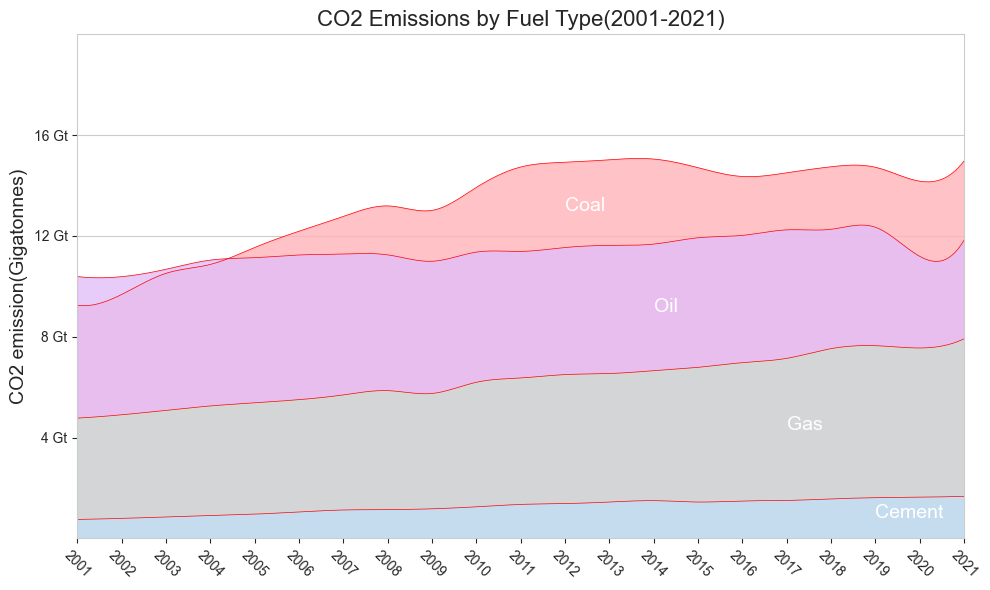

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

# Prepare the data
emissions_by_fuel_type = ems.groupby('Year')[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].sum().reset_index()

# Set up the plot
sns.set_style('whitegrid', {'axes.grid': False, 'axes.grid.axis': 'y', 'xtick.bottom': True, 'ytick.left': True})
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to plot smooth area curves with black boundary lines
def plot_smooth_area_curve(years, values, color, label, alpha):
    x_smooth = np.linspace(years.min(), years.max(), 300)
    y_smooth = interpolate.interp1d(years, values, kind='cubic')(x_smooth)
    ax.fill_between(x_smooth, y_smooth, color=color, label=label, alpha=alpha)
    ax.plot(x_smooth, y_smooth, color='red', linewidth=0.5)

# Plot the data
plot_smooth_area_curve(emissions_by_fuel_type['Year'], emissions_by_fuel_type['Coal'], '#FFB3BA', 'Coal', 0.8)
plot_smooth_area_curve(emissions_by_fuel_type['Year'], emissions_by_fuel_type['Oil'], '#E2BEF8', 'Oil', 0.8)
plot_smooth_area_curve(emissions_by_fuel_type['Year'], emissions_by_fuel_type['Gas'], '#C8E6C9', 'Gas', 0.6)
plot_smooth_area_curve(emissions_by_fuel_type['Year'], emissions_by_fuel_type['Cement'], '#BAE1FF', 'Cement', 0.6)

# Customize the plot
ax.set_xticks(emissions_by_fuel_type['Year'])
ax.set_xticklabels(emissions_by_fuel_type['Year'], rotation=-45)

# Set the x-axis limits to the minimum and maximum years
ax.set_xlim(emissions_by_fuel_type['Year'].min(), emissions_by_fuel_type['Year'].max())

ax.set_yticks([4e3, 8e3, 12e3, 16e3])
ax.set_yticklabels(['4 Gt', '8 Gt', '12 Gt', '16 Gt'])
ax.set_ylim(0, 20e3)
ax.set_ylabel('CO2 emission(Gigatonnes)', fontsize=14)

# Add text annotations
ax.text(2012, 13e3, 'Coal', color='white', size=14)
ax.text(2014, 9e3, 'Oil', color='white', size=14)
ax.text(2017, 4.3e3, 'Gas', color='white', size=14)
ax.text(2019, 0.8e3, 'Cement', color='white', size=14)

# Set the horizontal grid
plt.grid(axis='y')
plt.title('CO2 Emissions by Fuel Type(2001-2021)', fontsize=16)
plt.tight_layout()
plt.show()


&emsp; The plot provides a visual representation of **carbon dioxide emissions (in gigatonnes)** from various fuel sources over a **20-year period from 2001 to 2021**. The data reveals a general **upward trend** in emissions across most fuel sources, with **coal** being the **highest emitter**, followed by **oil** and **gas**. 

&emsp; Interestingly, there was a **downward trend in the year 2019** significantly impacted by the **coronavirus pandemic**, during which many countries imposed lockdowns to contain the virus, resulting in restricted industrial activities. 

&emsp; Although most sources show an upward trend in CO2 emissions over the years, the **cement industry** shows a relatively **stable trend** compared to the others.


### Climate Watch Dataset

**Summary**: The Climate Watch dataset is the most comprehensive dataset included on Climate Watch and covers all sectors and gases. To emphasize comparability of data across countries, it does not use countries' official inventories reported to the UNFCCC. The dataset has a 3-year lag.

**Original data sources**: International Energy Agency (IEA), U.S. Environmental Protection Agency, U.N. Food and Agriculture Organization, Global Carbon Project.

#### Dataset Details

- **Temporal coverage**: 1990-2019
- **Geographic coverage**: UNFCCC member states
- **Sector coverage** (sector definitions may vary across sources): Main IPCC sectors, including energy sub-sectors:
  - Agriculture
  - Bunker fuels
  - Energy
    - Electricity/heat
    - Fugitive emissions
    - Manufacturing/construction
    - Other fuel combustion
    - Transportation
  - Industrial processes
  - Land-use change and forestry
  - Waste
- **Gas coverage**: Kyoto GHGs (CH4, CO2, N2O, F-gases)
- **Timeliness**: 3-year lag
- **Use of country-reported data to the UNFCCC**: Does not use UNFCCC-reported data
- **Comparable methodology across countries**: Consistent methodology used across all countries to maximize comparability


In [26]:
ghg = pd.read_csv('../Datasets/ghg-emissions.csv', skipfooter=2)

In [27]:
ghg.head()

,Sector,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Agriculture,MtCO2e,4997.21,4987.90,4966.26,4935.60,4980.79,5037.62,5056.88,4986.25,...,5506.82,5640.65,5667.25,5608.45,5655.90,5682.10,5728.56,5815.96,5803.01,5794.61
1,Industrial Processes,MtCO2e,1008.39,1012.69,1028.82,1044.17,1152.16,1225.41,1276.66,1319.97,...,2221.78,2374.81,2457.21,2572.86,2694.22,2685.92,2785.78,2854.38,2967.38,3055.98
2,Land-Use Change and Forestry,MtCO2e,1909.33,1909.33,1909.33,1909.33,1909.35,1915.19,1711.37,2681.33,...,1490.21,404.68,432.64,388.26,737.94,786.46,1267.61,1220.05,1387.56,1641.67
3,Waste,MtCO2e,1364.40,1395.18,1418.28,1444.39,1470.96,1476.51,1478.31,1474.36,...,1465.13,1467.31,1476.63,1484.04,1514.26,1543.59,1560.85,1583.86,1606.86,1629.87
4,Building,MtCO2e,2880.88,2906.54,2795.60,2862.20,2775.49,2852.91,2916.24,2896.84,...,2991.40,2935.40,2878.58,2991.88,2938.79,2968.20,3005.85,3072.67,3105.53,3065.31


In [31]:
ghg.iloc[:, 2:].isnull().sum(axis=1)

Sector
Agriculture                     0
Industrial Processes            0
Land-Use Change and Forestry    0
Waste                           0
Building                        0
Electricity/Heat                0
Fugitive Emissions              0
Manufacturing/Construction      0
Other Fuel Combustion           0
Transportation                  0
dtype: int64

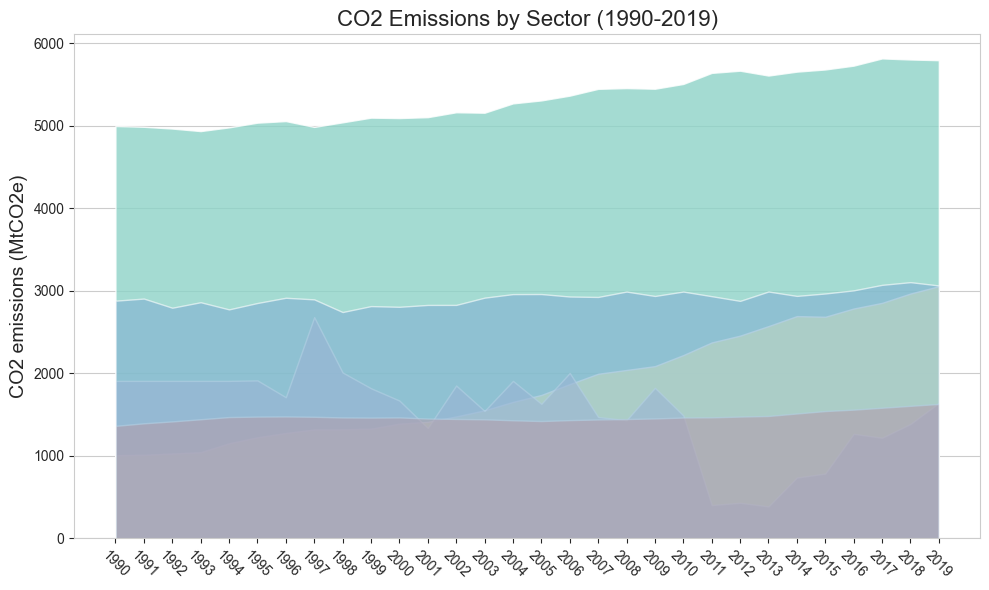

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_dataframe' with the name of your DataFrame variable
ghg = ghg.drop(columns=['unit'])
ghg.set_index('Sector', inplace=True)
emissions_by_sector = ghg.transpose()
emissions_by_sector.reset_index(inplace=True)
emissions_by_sector.rename(columns={'index': 'Year'}, inplace=True)
emissions_by_sector['Year'] = emissions_by_sector['Year'].astype(int)

# The rest of the code remains the same


# Set up the plot
sns.set_style('whitegrid', {'axes.grid': False, 'axes.grid.axis': 'y', 'xtick.bottom': True, 'ytick.left': True})
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.fill_between(emissions_by_sector['Year'], emissions_by_sector['Agriculture'], label='Agriculture', alpha=0.8)
ax.fill_between(emissions_by_sector['Year'], emissions_by_sector['Industrial Processes'], label='Industrial Processes', alpha=0.8)
ax.fill_between(emissions_by_sector['Year'], emissions_by_sector['Land-Use Change and Forestry'], label='Land-Use Change and Forestry', alpha=0.6)
ax.fill_between(emissions_by_sector['Year'], emissions_by_sector['Waste'], label='Waste', alpha=0.6)
ax.fill_between(emissions_by_sector['Year'], emissions_by_sector['Building'], label='Building', alpha=0.6)

# Customize the plot
ax.set_xticks(emissions_by_sector['Year'])
ax.set_xticklabels(emissions_by_sector['Year'], rotation=-45)
ax.set_ylim(0)
ax.set_ylabel('CO2 emissions (MtCO2e)', fontsize=14)

# Add text annotations
#ax.text(2010, 5000, 'Agriculture', color='white', size=14)
#ax.text(2010, 2500, 'Industrial Processes', color='white', size=14)
#ax.text(2010, 1500, 'Land-Use Change\nand Forestry', color='white', size=14)
#ax.text(2010, 500, 'Waste', color='white', size=14)
#ax.text(2010, 3000, 'Building', color='white', size=14)

# Set the horizontal grid
plt.grid(axis='y')
plt.title('CO2 Emissions by Sector (1990-2019)', fontsize=16)
plt.tight_layout()
plt.show()


### YourName 2

In [1]:
# Insert your code here

### YourName 3

In [ ]:
# Insert your code here

### YourName 4

In [ ]:
# Insert your code here